## Final Project Submission

Please fill out:
* Student name: Michael Flores
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni
* Blog post URL:


In [136]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier # K-nearest Neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc, r2_score, mean_squared_error
from sklearn.metrics import plot_confusion_matrix,confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import xgboost as xgb
%matplotlib inline

In [81]:
data = pd.read_csv('chicago_cleaned_dataset')
data.head()

CRASH_RECORD_ID  POSTED_SPEED_LIMIT  \
0  0564e565ebda939c88d5da6d613ac5789b702cbff5b874...                  20   
1  0fa4884149aa03acef4572d0d6b4de24104843772f177e...                  30   
2  14d735b2068198c785b0449abe59c143ccf8fe564776ad...                  30   
3  1d191ccd52478ee352b4f9326a406c7a311ce140f19fff...                  35   
4  1d6129948f25958aaa828c48f46ede1d07d9a14a29431f...                  30   

  TRAFFIC_CONTROL_DEVICE      DEVICE_CONDITION WEATHER_CONDITION  \
0                 SIGNAL  FUNCTIONING PROPERLY             CLEAR   
1                  OTHER           NO CONTROLS             CLEAR   
2            NO CONTROLS           NO CONTROLS             CLEAR   
3                 SIGNAL           NO CONTROLS             CLEAR   
4            NO CONTROLS           NO CONTROLS             CLEAR   

  LIGHTING_CONDITION   FIRST_CRASH_TYPE                  TRAFFICWAY_TYPE  \
0              LIGHT      PERSON/ANIMAL                      NOT DIVIDED   
1              LIGHT            TURNING                      NOT DIVIDED   
2           DARKNESS  PARKED CAR/OBJECT                      NOT DIVIDED   
3              LIGHT           REAR END  DIVIDED - W/MEDIAN (NOT RAISED)   
4         SOME LIGHT  PARKED CAR/OBJECT                          ONE-WAY   

   ROAD_DEFECT  INTERSECTION_RELATED_I  ...  INJURIES_TOTAL  CRASH_HOUR  \
0            0                       0  ...             0.0          15   
1            0                       0  ...             0.0          15   
2            0                       0  ...             0.0          18   
3            0                       1  ...             0.0          12   
4            0                       0  ...             1.0          23   

  CRASH_DAY_OF_WEEK  CRASH_MONTH   LATITUDE  LONGITUDE  ALIGNMENT_STRAIGHT  \
0                 3           12  41.954196 -87.669193                   1   
1                 4            9  41.759853 -87.644338                   1   
2                 1           11  41.924362 -87.745377                   1   
3                 1           12  41.946544 -87.703072                   1   
4                 4            9  41.892782 -87.615890                   1   

  ROADWAY_SURFACE_COND_DRY  CRASH_TYPE_NO_INJURY  DAMAGE_DOLLARS  
0                        1                     1     500 OR LESS  
1                        1                     1       OVER 1500  
2                        1                     1   501 THRU 1500  
3                        1                     1   501 THRU 1500  
4                        1                     0       OVER 1500  

[5 rows x 28 columns]

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63774 entries, 0 to 63773
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CRASH_RECORD_ID           63774 non-null  object 
 1   POSTED_SPEED_LIMIT        63774 non-null  int64  
 2   TRAFFIC_CONTROL_DEVICE    63774 non-null  object 
 3   DEVICE_CONDITION          63774 non-null  object 
 4   WEATHER_CONDITION         63774 non-null  object 
 5   LIGHTING_CONDITION        63774 non-null  object 
 6   FIRST_CRASH_TYPE          63774 non-null  object 
 7   TRAFFICWAY_TYPE           63774 non-null  object 
 8   ROAD_DEFECT               63774 non-null  int64  
 9   INTERSECTION_RELATED_I    63774 non-null  int64  
 10  NOT_RIGHT_OF_WAY_I        63774 non-null  int64  
 11  HIT_AND_RUN_I             63774 non-null  int64  
 12  PRIM_CONTRIBUTORY_CAUSE   63774 non-null  object 
 13  DOORING_I                 63774 non-null  int64  
 14  WORK_Z

In [83]:
data = data.drop(columns = ['CRASH_RECORD_ID'])

In [84]:
X = data.drop('PRIM_CONTRIBUTORY_CAUSE', axis=1)  
y = data['PRIM_CONTRIBUTORY_CAUSE'] 

In [85]:
data_dummies = pd.get_dummies(X)

In [86]:
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63774 entries, 0 to 63773
Data columns (total 64 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   POSTED_SPEED_LIMIT                                63774 non-null  int64  
 1   ROAD_DEFECT                                       63774 non-null  int64  
 2   INTERSECTION_RELATED_I                            63774 non-null  int64  
 3   NOT_RIGHT_OF_WAY_I                                63774 non-null  int64  
 4   HIT_AND_RUN_I                                     63774 non-null  int64  
 5   DOORING_I                                         63774 non-null  int64  
 6   WORK_ZONE_I                                       63774 non-null  int64  
 7   WORKERS_PRESENT_I                                 63774 non-null  int64  
 8   NUM_UNITS                                         63774 non-null  int64  
 9   INJURIES_TOTAL   

In [93]:
data_dummies.head()

POSTED_SPEED_LIMIT  ROAD_DEFECT  INTERSECTION_RELATED_I  \
0                  20            0                       0   
1                  30            0                       0   
2                  30            0                       0   
3                  35            0                       1   
4                  30            0                       0   

   NOT_RIGHT_OF_WAY_I  HIT_AND_RUN_I  DOORING_I  WORK_ZONE_I  \
0                   0              0          0            0   
1                   0              0          0            0   
2                   0              1          0            0   
3                   0              0          0            0   
4                   0              0          0            0   

   WORKERS_PRESENT_I  NUM_UNITS  INJURIES_TOTAL  ...  \
0                  0          2             0.0  ...   
1                  0          2             0.0  ...   
2                  0          2             0.0  ...   
3                  0          2             0.0  ...   
4                  0          2             1.0  ...   

   TRAFFICWAY_TYPE_PARKING LOT  TRAFFICWAY_TYPE_RAMP  \
0                            0                     0   
1                            0                     0   
2                            0                     0   
3                            0                     0   
4                            0                     0   

   TRAFFICWAY_TYPE_TRAFFIC ROUTE  MOST_SEVERE_INJURY_FATAL  \
0                              0                         0   
1                              0                         0   
2                              0                         0   
3                              0                         0   
4                              0                         0   

   MOST_SEVERE_INJURY_MAJOR INJURIES  MOST_SEVERE_INJURY_MINOR INJURIES  \
0                                  0                                  0   
1                                  0                                  0   
2                                  0                                  0   
3                                  0                                  0   
4                                  1                                  0   

   MOST_SEVERE_INJURY_NO INJURY  DAMAGE_DOLLARS_500 OR LESS  \
0                             1                           1   
1                             1                           0   
2                             1                           0   
3                             1                           0   
4                             0                           0   

   DAMAGE_DOLLARS_501 THRU 1500  DAMAGE_DOLLARS_OVER 1500  
0                             0                         0  
1                             0                         1  
2                             1                         0  
3                             1                         0  
4                             0                         1  

[5 rows x 64 columns]

In [87]:
data_dummies.columns

Index(['POSTED_SPEED_LIMIT', 'ROAD_DEFECT', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORKERS_PRESENT_I', 'NUM_UNITS', 'INJURIES_TOTAL', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE',
       'ALIGNMENT_STRAIGHT', 'ROADWAY_SURFACE_COND_DRY',
       'CRASH_TYPE_NO_INJURY', 'TRAFFIC_CONTROL_DEVICE_NO CONTROLS',
       'TRAFFIC_CONTROL_DEVICE_OTHER', 'TRAFFIC_CONTROL_DEVICE_SIGN',
       'TRAFFIC_CONTROL_DEVICE_SIGNAL',
       'DEVICE_CONDITION_FUNCTIONING IMPROPERLY/ MISSING',
       'DEVICE_CONDITION_FUNCTIONING PROPERLY', 'DEVICE_CONDITION_NO CONTROLS',
       'WEATHER_CONDITION_CLEAR', 'WEATHER_CONDITION_OTHER',
       'WEATHER_CONDITION_PRECIPITATION', 'LIGHTING_CONDITION_DARKNESS',
       'LIGHTING_CONDITION_LIGHT', 'LIGHTING_CONDITION_SOME LIGHT',
       'FIRST_CRASH_TYPE_ANGLE', 'FIRST_CRASH_TYPE_HEAD ON',
       'FIRST_CRASH_TYPE_OTHER NONCOLLISION', 'FIRST_CRASH_TYPE_OVERTURNED',


# Model 1 - K- Nearest Neighbors

In [88]:
X_train, X_test, y_train, y_test = train_test_split(data_dummies, y, test_size=0.25, random_state=42)

In [141]:
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=X_train.columns)
scaled_df_train.head()

POSTED_SPEED_LIMIT  ROAD_DEFECT  INTERSECTION_RELATED_I  \
0            0.195942    -0.134912                1.550884   
1            0.195942    -0.134912               -0.644794   
2            0.195942    -0.134912               -0.644794   
3            0.195942    -0.134912               -0.644794   
4           -1.652599    -0.134912               -0.644794   

   NOT_RIGHT_OF_WAY_I  HIT_AND_RUN_I  DOORING_I  WORK_ZONE_I  \
0           -0.203612      -0.529545  -0.039893    -0.069512   
1           -0.203612      -0.529545  -0.039893    -0.069512   
2           -0.203612      -0.529545  -0.039893    -0.069512   
3           -0.203612      -0.529545  -0.039893    -0.069512   
4           -0.203612       1.888415  -0.039893    -0.069512   

   WORKERS_PRESENT_I  NUM_UNITS  INJURIES_TOTAL  ...  \
0          -0.041187  -0.123697       -0.390350  ...   
1          -0.041187  -0.123697       -0.390350  ...   
2          -0.041187  -0.123697        1.147199  ...   
3          -0.041187  -0.123697       -0.390350  ...   
4          -0.041187  -0.123697       -0.390350  ...   

   TRAFFICWAY_TYPE_PARKING LOT  TRAFFICWAY_TYPE_RAMP  \
0                    -0.234843              -0.05937   
1                    -0.234843              -0.05937   
2                    -0.234843              -0.05937   
3                    -0.234843              -0.05937   
4                    -0.234843              -0.05937   

   TRAFFICWAY_TYPE_TRAFFIC ROUTE  MOST_SEVERE_INJURY_FATAL  \
0                      -0.043177                 -0.035143   
1                      -0.043177                 -0.035143   
2                      -0.043177                 -0.035143   
3                      -0.043177                 -0.035143   
4                      -0.043177                 -0.035143   

   MOST_SEVERE_INJURY_MAJOR INJURIES  MOST_SEVERE_INJURY_MINOR INJURIES  \
0                           -0.15513                          -0.429156   
1                           -0.15513                          -0.429156   
2                           -0.15513                           2.330156   
3                           -0.15513                          -0.429156   
4                           -0.15513                          -0.429156   

   MOST_SEVERE_INJURY_NO INJURY  DAMAGE_DOLLARS_500 OR LESS  \
0                      0.468939                   -0.365808   
1                      0.468939                   -0.365808   
2                     -2.132472                   -0.365808   
3                      0.468939                   -0.365808   
4                      0.468939                   -0.365808   

   DAMAGE_DOLLARS_501 THRU 1500  DAMAGE_DOLLARS_OVER 1500  
0                     -0.581100                  0.767109  
1                      1.720873                 -1.303596  
2                     -0.581100                  0.767109  
3                     -0.581100                  0.767109  
4                     -0.581100                  0.767109  

[5 rows x 64 columns]

In [142]:
# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier()

# Fit the classifier
clf.fit(scaled_data_train, y_train)

# Predict on the test set
test_preds = clf.predict(scaled_data_test)

In [143]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds, average= 'weighted')))
    print("Recall Score: {}".format(recall_score(labels, preds,average='weighted')))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds,average= 'weighted')))
    
print_metrics(y_test, test_preds)

Precision Score: 0.6245726083279394
Recall Score: 0.6397390868038133
Accuracy Score: 0.6397390868038133
F1 Score: 0.6286694951738527


In [144]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=10):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds,average= 'weighted')
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [145]:
find_best_k(scaled_data_train, y_train, scaled_data_test, y_test)

Best Value for k: 9
F1-Score: 0.6435813254706622


In [146]:
X_train = scaled_data_train
X_test = scaled_data_test

In [147]:
clf = KNeighborsClassifier(n_neighbors = 9)

# Fit the classifier
clf.fit(X_train, y_train)

# Predict on the test set
test_preds = clf.predict(X_test)

In [148]:
print_metrics(y_test, test_preds)

Precision Score: 0.639070527935721
Recall Score: 0.6610010035122931
Accuracy Score: 0.6610010035122931
F1 Score: 0.6435813254706622


<Figure size 720x720 with 0 Axes>

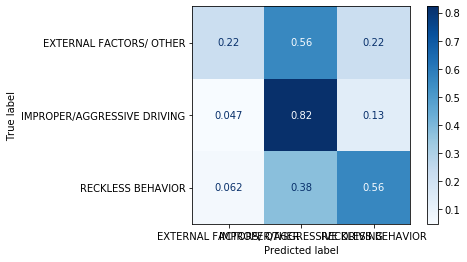

In [149]:
plt.figure(figsize =(10,10))
plot_confusion_matrix(clf, X_test, y_test,
                     cmap=plt.cm.Blues,normalize='true')
plt.show()

# Model 2 - Decision Trees

In [150]:
# Train a DT classifier
classifier = DecisionTreeClassifier(random_state=42)  
classifier.fit(X_train, y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [151]:
y_pred = classifier.predict(X_test)  

In [152]:
print_metrics(y_test, y_pred)

Precision Score: 0.5678370009559988
Recall Score: 0.5637230306071249
Accuracy Score: 0.5637230306071249
F1 Score: 0.565689415310054


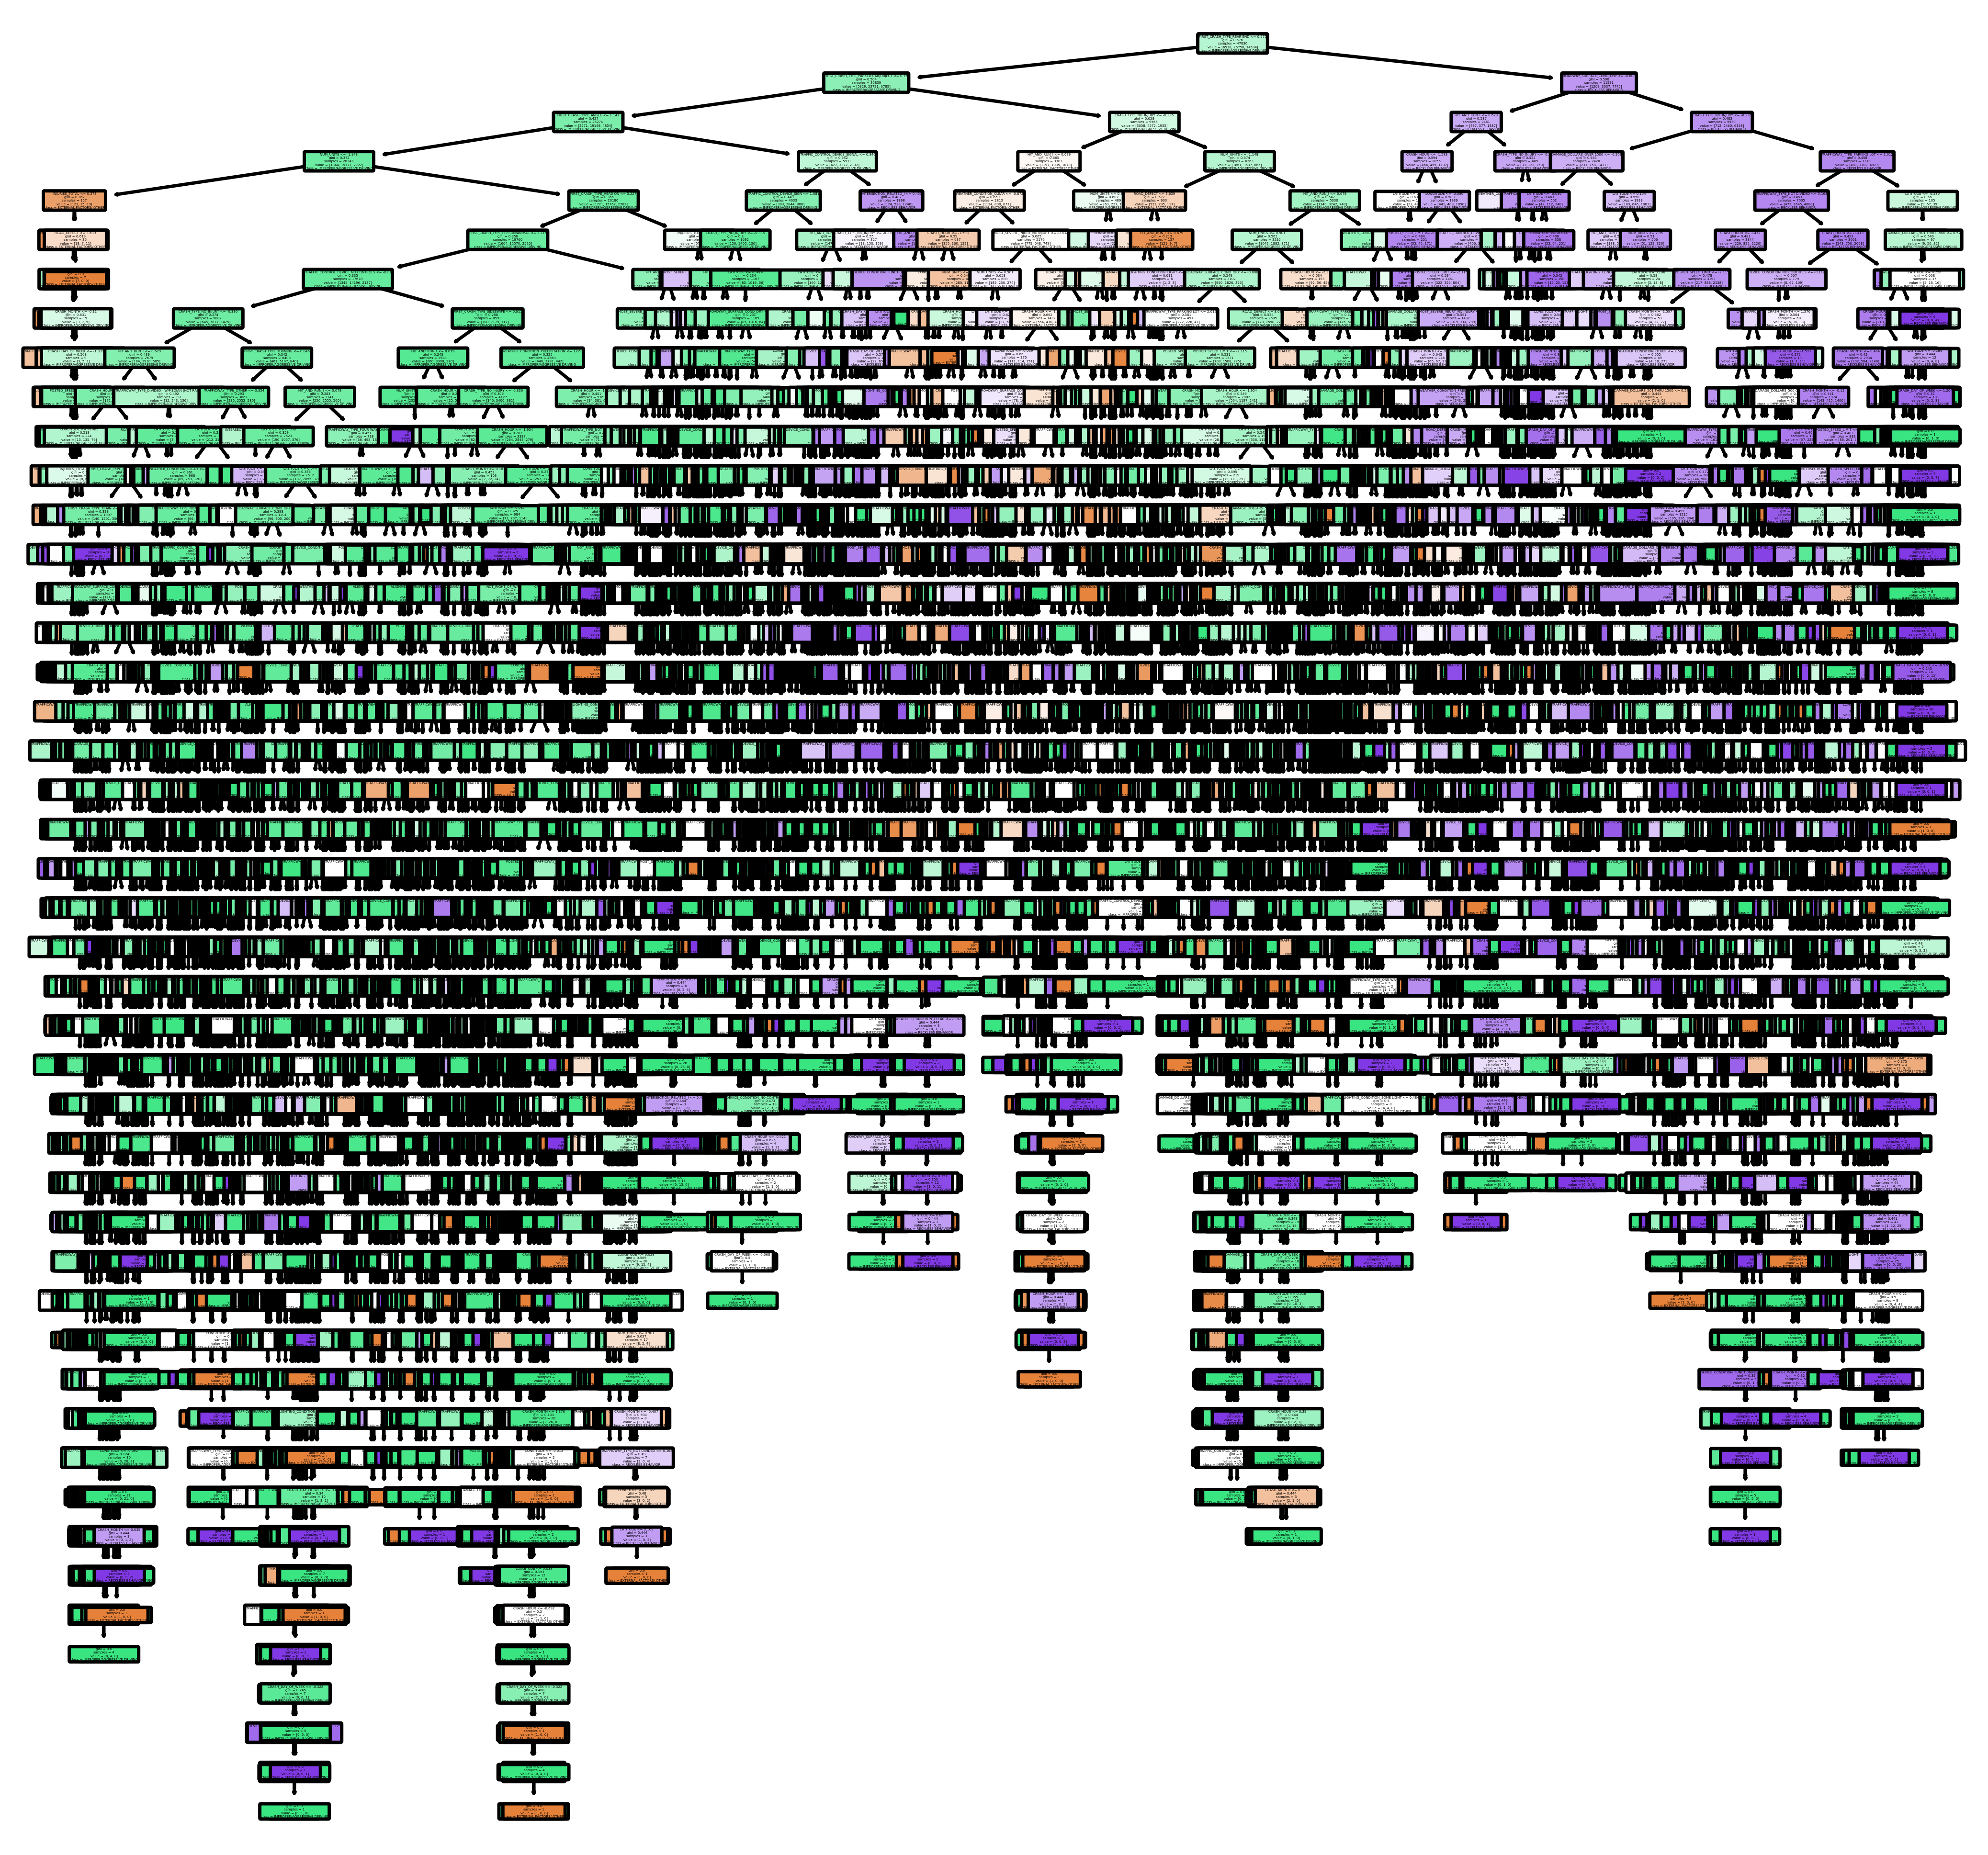

In [154]:
plt.figure(figsize=(10,10), dpi=500)
tree.plot_tree(classifier, 
               feature_names=data_dummies.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
plt.show()

<Figure size 720x720 with 0 Axes>

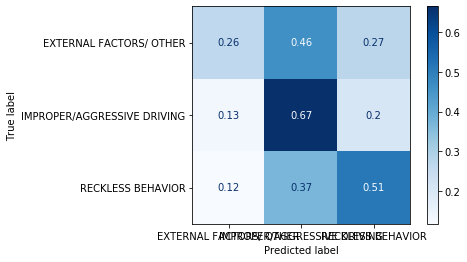

In [155]:
plt.figure(figsize =(10,10))
plot_confusion_matrix(classifier, X_test, y_test,
                     cmap=plt.cm.Blues,normalize='true')
plt.show()

# Model 3 - Random Forests

In [158]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [159]:
tree_clf.feature_importances_

array([0.00000000e+00, 4.49235240e-03, 3.92314248e-03, 0.00000000e+00,
       1.83082383e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.75907908e-02, 9.33851974e-04, 1.12426570e-03, 0.00000000e+00,
       0.00000000e+00, 3.21826007e-03, 1.06323141e-03, 0.00000000e+00,
       8.65231297e-03, 4.10787118e-02, 0.00000000e+00, 0.00000000e+00,
       1.62574848e-02, 7.75497760e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.17325340e-03, 0.00000000e+00, 6.19844049e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.95910238e-02,
       1.33571192e-02, 0.00000000e+00, 0.00000000e+00, 1.32811439e-01,
       0.00000000e+00, 5.46249207e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.29499745e-03,
       0.00000000e+00, 4.49536088e-04, 3.35985911e-03, 0.00000000e+00,
      

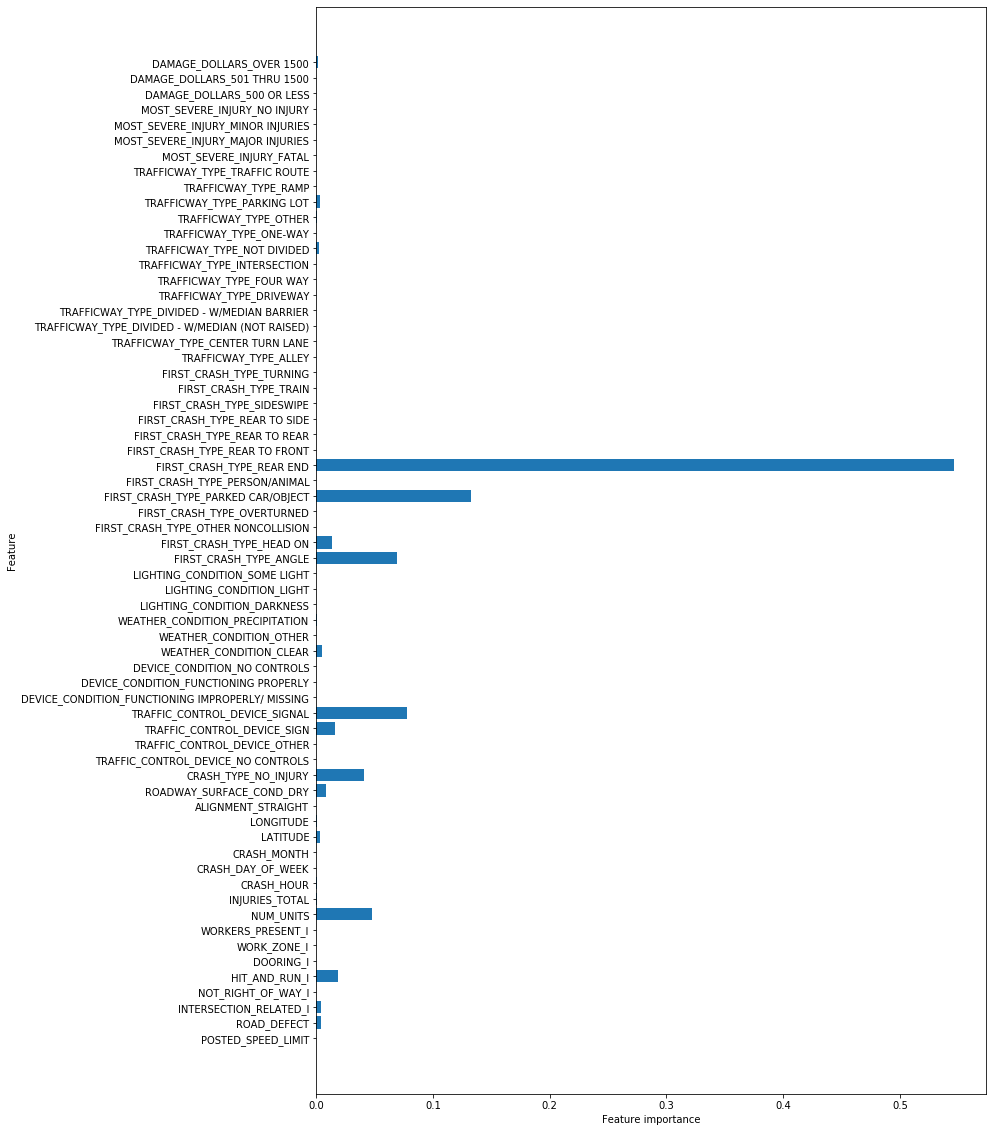

In [162]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(12,20))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), scaled_df_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [163]:
pred = tree_clf.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 570 1152  477]
 [ 368 7420 1182]
 [ 353 1502 2920]]
                             precision    recall  f1-score   support

    EXTERNAL FACTORS/ OTHER       0.44      0.26      0.33      2199
IMPROPER/AGGRESSIVE DRIVING       0.74      0.83      0.78      8970
          RECKLESS BEHAVIOR       0.64      0.61      0.62      4775

                   accuracy                           0.68     15944
                  macro avg       0.61      0.57      0.58     15944
               weighted avg       0.67      0.68      0.67     15944



In [164]:
# Instantiate a BaggingClassifier
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)

In [165]:
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,
   

In [166]:
bagged_tree.score(X_train, y_train)

0.6880827932260087

In [167]:
bagged_tree.score(X_test, y_test)

0.6841445057701957

In [168]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [169]:
forest.score(X_train, y_train)

0.6664854693706879

In [170]:
forest.score(X_test, y_test)

0.6648268941294531

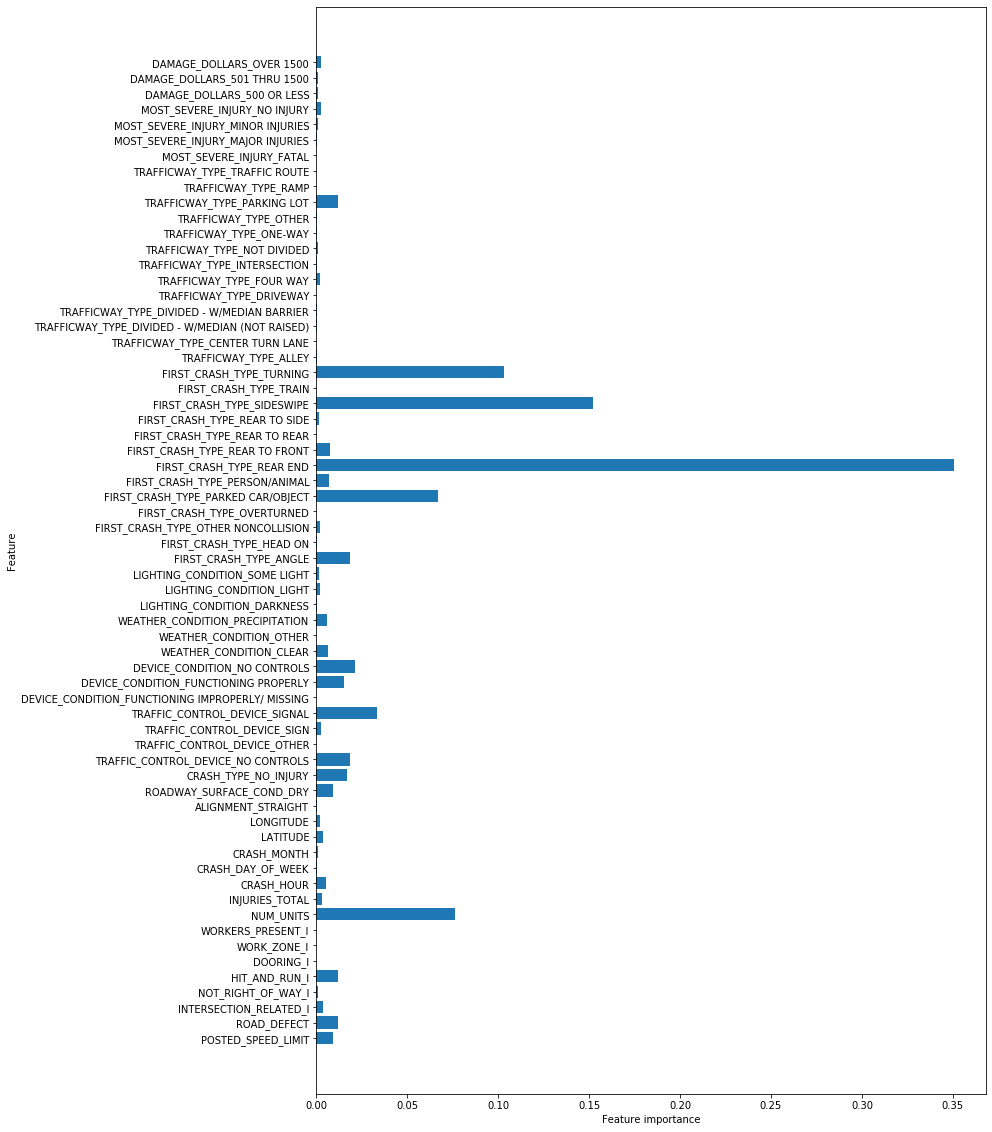

In [171]:
plot_feature_importances(forest)

# Model 4 - Gridsearch

In [172]:
dt_clf = DecisionTreeClassifier()

dt_cv_score = cross_val_score(dt_clf, X_train, y_train, cv=3)
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Mean Cross Validation Score: 56.21%


In [173]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [174]:
# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [175]:
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 70.68%
Mean Test Score: 68.82%
Best Parameter Combination Found During Grid Search:


{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [176]:
rf_clf = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(rf_clf, X_train, y_train, cv=3))

print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")

Mean Cross Validation Score for Random Forest Classifier: 68.45%


In [177]:
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

In [178]:
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)

print(f"Training Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Training Accuracy: 69.30%

Optimal Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 100}


# Model 5 - XGBoost

In [179]:
clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)
training_preds = clf.predict(X_train)
val_preds = clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Training Accuracy: 69.38%
Validation accuracy: 69.06%


In [180]:
param_grid = {
    "learning_rate": [0.1],
    'max_depth': [6],
    'min_child_weight': [10],
    'subsample': [ 0.7],
    'n_estimators': [5, 30, 100, 250],
}

In [ ]:
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(data_dummies, y)

best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train)
val_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))